In [1]:
import healpy as hp
from astropy.cosmology import Planck18 as cosmos
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib as mpl
mpl.rcParams['font.size'] = 15
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
os.chdir('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/auto_correlation/')

In [3]:
fwhm = cosmos.comoving_distance(1.51).to('Mpc').value*(6*u.arcmin).to('rad').value*cosmos.h     # h^-1 Mpc
sigma = fwhm / np.sqrt(8*np.log(2))

figure:

- auto corr of low high L, in one figure
- auto corr of different z bin
- cross corr of low high L
- cross corr of differnet z bin
- cross corr of random, quasar and q-r, and covariance matrix

In [4]:
lcut = 6
rcut = None

In [5]:
def get_wp(file):
    dat = np.load(file)
    wp = dat.mean(axis=0)
    wp_std = dat.std(axis=0, ddof=0)*np.sqrt(dat.shape[0] - 1)
    return (wp[lcut:rcut], wp_std[lcut:rcut])

In [6]:
wp_dict = {
    'total' :    get_wp('quasar_lss_all_auto.npy'),
    'high'  :    get_wp('quasar_lss_high_L_auto.npy'),
    'low'   :    get_wp('quasar_lss_low_L_auto.npy'),
    'z1'    :    get_wp('quasar_lss_z1_auto.npy'),
    'z2'    :    get_wp('quasar_lss_z2_auto.npy'),
    'z3'    :    get_wp('quasar_lss_z3_auto.npy'),
}

In [7]:
Nbins = 15
rp_min = 3
rp_max = 100

rp_bin_cross = np.geomspace(rp_min, rp_max, Nbins+1)
r_p_cross = (rp_bin_cross[:-1]*rp_bin_cross[1:])**0.5

sep = (np.log10(rp_max) - np.log10(rp_min)) / Nbins
rp_bin_auto = 10**(np.arange(-10, Nbins+1)*sep + np.log10(rp_min))
# rp_bin_auto = np.geomspace(rp_min, rp_max, Nbins+1)
r_p_auto = (rp_bin_auto[:-1]*rp_bin_auto[1:])**0.5
r_p_auto =  r_p_auto[lcut:rcut]

In [9]:
lines = []
for i in range(len(r_p_auto)):
    line = f'{r_p_auto[i]:.3f}'
    for catagory in ['total', 'high', 'low', 'z1', 'z2', 'z3']:
        line += f'&{wp_dict[catagory][0][i]:.3f}({wp_dict[catagory][1][i]:.3f})'
    line += r'\\'
    lines.append(line)
print('\n'.join(lines))

1.324&76.259(6.251)&71.688(13.289)&87.634(13.866)&65.803(10.441)&72.856(11.260)&79.155(12.850)\\
1.672&53.411(5.988)&55.086(11.197)&58.072(11.053)&47.535(9.267)&51.415(9.090)&66.275(10.576)\\
2.113&44.071(4.207)&41.764(7.814)&47.936(8.259)&36.517(6.158)&44.598(7.068)&52.379(8.243)\\
2.669&39.081(3.080)&33.744(5.987)&39.031(6.319)&26.384(4.921)&46.218(5.820)&45.582(6.336)\\
3.372&34.431(2.781)&31.954(4.740)&31.427(4.933)&31.600(4.251)&28.375(4.341)&43.435(5.363)\\
4.260&29.598(2.099)&33.216(3.843)&25.680(4.190)&30.167(3.585)&30.809(3.650)&30.282(4.292)\\
5.382&23.730(1.693)&26.434(3.506)&22.040(3.379)&19.285(2.723)&27.478(2.784)&27.122(2.983)\\
6.799&18.933(1.334)&16.468(2.304)&18.061(2.479)&16.546(2.166)&18.523(1.971)&22.293(2.435)\\
8.590&18.317(1.026)&18.189(1.826)&17.617(1.853)&15.038(1.673)&17.652(1.850)&22.953(1.975)\\
10.852&12.868(0.841)&15.087(1.509)&11.531(1.629)&12.351(1.353)&11.698(1.447)&13.880(1.554)\\
13.710&10.206(0.608)&11.224(1.208)&9.776(1.292)&9.082(1.103)&10.768(1.0

In [10]:
errorbar_kw = {'capsize': 2}

In [11]:
rp_range = [r_p_auto[0]/1.2, r_p_auto[-1]*1.2]
wp_range = [0.8*1e-1, 2e2]
wpm_range = [0.8*1e-2, 2e1]

# Sub sample Comp(wp)

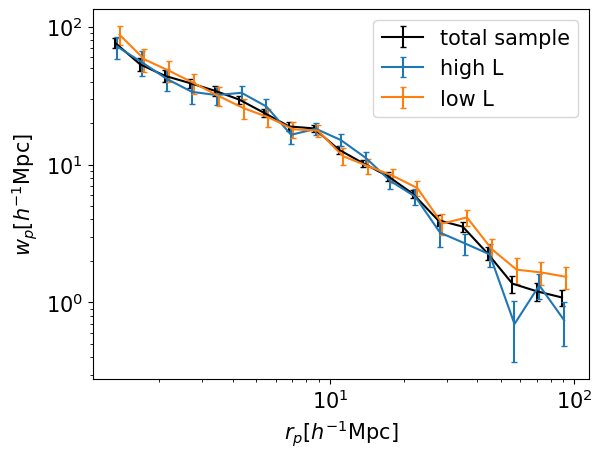

In [12]:
plt.errorbar(r_p_auto, *wp_dict['total'], label='total sample', color='black', **errorbar_kw)
plt.errorbar(r_p_auto*1.02, *wp_dict['high'], label='high L', **errorbar_kw)
plt.errorbar(r_p_auto*1.02**2, *wp_dict['low'], label='low L', **errorbar_kw)
plt.xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
plt.ylabel(r'$w_p[h^{-1}\mathrm{Mpc}]$')
plt.legend()
plt.loglog()

plt.savefig('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/figure/wp L.pdf', bbox_inches='tight')

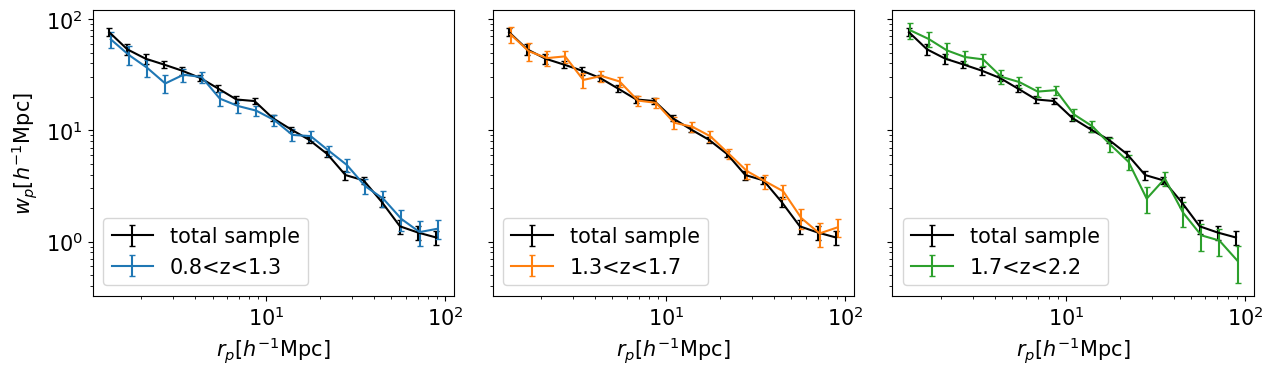

In [13]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(13, 4))
labels = [
    '0.8<z<1.3',
    '1.3<z<1.7',
    '1.7<z<2.2'
]
for i in range(3):
    axes[i].errorbar(r_p_auto, *wp_dict['total'], label='total sample', color='black', **errorbar_kw)
    axes[i].errorbar(r_p_auto*1.02, *wp_dict[f'z{i+1}'], label=labels[i], color=colors[i], **errorbar_kw)
    axes[i].set_xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
    axes[i].legend(loc='lower left')
    axes[i].loglog()
axes[0].set_ylabel(r'$w_p[h^{-1}\mathrm{Mpc}]$')
plt.tight_layout()

plt.savefig('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/figure/wp z.pdf', bbox_inches='tight')

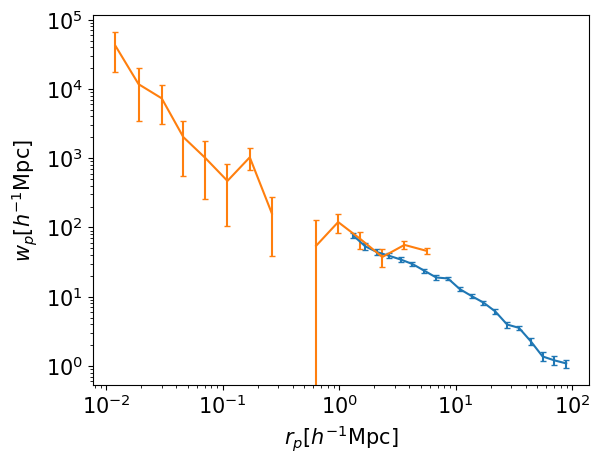

In [14]:
wp_small = pd.read_csv('small_scale')
plt.errorbar(r_p_auto, *wp_dict['total'], **errorbar_kw)
plt.errorbar(wp_small['rp'], wp_small['wp'], wp_small['wp_err'], **errorbar_kw)

plt.xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
plt.ylabel(r'$w_p[h^{-1}\mathrm{Mpc}]$')
# plt.legend()
plt.loglog()        # cut 0-3 points(very small scale) and the overlapping part
plt.savefig('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/figure/wp small.pdf', bbox_inches='tight')

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from data_process import jackknife_label, load_calculation_data, calculate_jackknife_variance_global
import astropy.units as u
from astropy.cosmology import Planck18 as cosmos
import astropy.coordinates as coo
h = cosmos.H0.value/100
z = 0
scale_factor = cosmos.Om(z) * cosmos.critical_density(z).to('M_sun/pc^3').value / h**2 * 1e6
jack_cross = {}
wpm_dict = {}

In [16]:
r_p, dat = load_calculation_data(f'../calculation_data/result_r=3_100_15_quasar_lss_all_CMB_smoothed_6_tree.npy', return_rp=True)
dat_r = load_calculation_data(f'../calculation_data/result_r=3_100_15_random_quasar_lss_all_CMB_smoothed_6_tree.npy')
Nside_jack = 10
quasar_cata = np.load('../catalogue/quasar_lss_all.npy')
random_sample = np.load('../catalogue/random_quasar_lss_all.npy')

pix = jackknife_label(quasar_cata, Nside_jack)
pix_r = jackknife_label(random_sample, Nside_jack)
sampler_q = calculate_jackknife_variance_global(dat[0], dat[1], pix, dat_r[0], dat_r[1], pix_r, norm_cov=True, return_jackknife=True)
jack_cross['total'] = sampler_q['jackknife']
wpm_dict['total'] = sampler_q['mean']/scale_factor, sampler_q['std']/scale_factor

In [17]:
for catalogue in ['high', 'low']:
    r_p, dat = load_calculation_data(f'../calculation_data/result_r=3_100_15_quasar_lss_{catalogue}_L_CMB_smoothed_6_tree.npy', return_rp=True)
    dat_r = load_calculation_data(f'../calculation_data/result_r=3_100_15_random_quasar_lss_all_CMB_smoothed_6_tree.npy')
    Nside_jack = 10
    quasar_cata = np.load(f'../catalogue/quasar_lss_{catalogue}_L.npy')
    random_sample = np.load('../catalogue/random_quasar_lss_all.npy')

    pix = jackknife_label(quasar_cata, Nside_jack)
    pix_r = jackknife_label(random_sample, Nside_jack)
    sampler_q = calculate_jackknife_variance_global(dat[0], dat[1], pix, dat_r[0], dat_r[1], pix_r, norm_cov=True, return_jackknife=True)
    jackknife = sampler_q['jackknife']
    jack_cross[catalogue] = sampler_q['jackknife']
    wpm_dict[catalogue] = (jackknife.mean(axis=0)/scale_factor, jackknife.std(axis=0, ddof=0)*np.sqrt(jackknife.shape[0] - 1)/scale_factor)

In [18]:
for catalogue in ['z1', 'z2', 'z3']:
    r_p, dat = load_calculation_data(f'../calculation_data/result_r=3_100_15_quasar_lss_{catalogue}_CMB_smoothed_6_tree.npy', return_rp=True)
    dat_r = load_calculation_data(f'../calculation_data/result_r=3_100_15_random_{catalogue}_CMB_smoothed_6_tree.npy')
    Nside_jack = 10
    quasar_cata = np.load(f'../catalogue/quasar_lss_{catalogue}.npy')
    random_sample = np.load(f'../catalogue/random_{catalogue}.npy')

    pix = jackknife_label(quasar_cata, Nside_jack)
    pix_r = jackknife_label(random_sample, Nside_jack)
    sampler_q = calculate_jackknife_variance_global(dat[0], dat[1], pix, dat_r[0], dat_r[1], pix_r, norm_cov=True, return_jackknife=True)
    jackknife = sampler_q['jackknife']
    jack_cross[catalogue] = sampler_q['jackknife']
    wpm_dict[catalogue] = (jackknife.mean(axis=0)/scale_factor, jackknife.std(axis=0, ddof=0)*np.sqrt(jackknife.shape[0] - 1)/scale_factor)

In [14]:
import pickle
with open('wp_jackknife_cross.pkl', 'wb') as f:
    pickle.dump({'r_p_auto': r_p_auto, 'r_p_cross': r_p, 'wpm_dict': wpm_dict, 'wp_dict': wp_dict}, f)

In [19]:
lines = []
for i in range(len(r_p)):
    line = f'{r_p[i]:.3f}'
    for catagory in ['total', 'high', 'low', 'z1', 'z2', 'z3']:
        line += f'&{wpm_dict[catagory][0][i]:.3f}({wpm_dict[catagory][1][i]:.3f})'
    line += r'\\'
    lines.append(line)
print('\n'.join(lines))

3.372&13.471(2.595)&11.094(3.853)&15.838(3.490)&8.820(4.751)&14.966(4.886)&15.386(3.838)\\
4.260&11.431(2.205)&10.871(2.955)&12.079(2.919)&14.346(4.635)&6.476(3.856)&12.461(3.421)\\
5.382&8.400(1.823)&6.802(2.705)&9.890(2.292)&11.901(3.516)&7.355(3.273)&7.545(2.458)\\
6.799&5.917(1.458)&6.180(2.042)&5.495(1.843)&9.942(2.840)&2.401(2.604)&6.137(2.086)\\
8.590&6.148(1.250)&7.036(1.812)&5.369(1.745)&9.503(2.518)&3.157(2.224)&6.878(1.872)\\
10.852&4.465(1.102)&4.530(1.521)&4.444(1.438)&6.858(2.197)&2.521(1.737)&5.039(1.492)\\
13.710&4.363(0.822)&4.196(1.148)&4.509(1.245)&6.945(1.632)&3.681(1.504)&3.513(1.227)\\
17.321&2.387(0.695)&2.754(0.877)&1.932(1.060)&3.080(1.329)&4.087(1.259)&0.723(1.092)\\
21.882&1.234(0.577)&1.896(0.821)&0.562(0.844)&1.768(1.148)&2.166(0.964)&0.840(0.904)\\
27.645&1.486(0.497)&1.624(0.663)&1.285(0.696)&1.802(0.923)&1.435(0.828)&1.536(0.690)\\
34.925&0.777(0.392)&0.708(0.553)&0.813(0.529)&0.925(0.768)&-0.207(0.725)&2.121(0.600)\\
44.123&0.521(0.355)&0.944(0.450)&0.1

# Sub sample Comp(kappa)

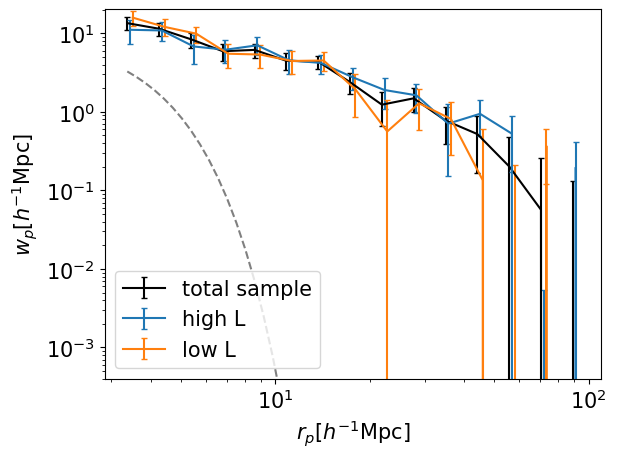

In [ ]:
errorbar_kw = {'capsize': 2}

r_pp = np.geomspace(r_p[0], r_p[-1], 50)

plt.errorbar(r_p, *wpm_dict['total'], label='total sample', color='black', **errorbar_kw)
plt.errorbar(r_p*1.02, *wpm_dict['high'], label='high L', **errorbar_kw)
plt.errorbar(r_p*1.02**2, *wpm_dict['low'], label='low L', **errorbar_kw)
plt.plot(r_pp, np.exp(-r_pp*r_pp/(2*sigma*sigma))*10, '--', color='grey')

plt.ylim(bottom=4e-4)

plt.xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
plt.ylabel(r'$w_p[h^{-1}\mathrm{Mpc}]$')

# secax = plt.gca().secondary_yaxis('right', functions=(lambda y: y * scale_factor, lambda y: y / scale_factor))
# plt.ylabel(r'$\Sigma[h M_\odot /\mathrm{pc}^2]$')

plt.legend()
plt.loglog()

plt.savefig('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/figure/kappa L.pdf', bbox_inches='tight')


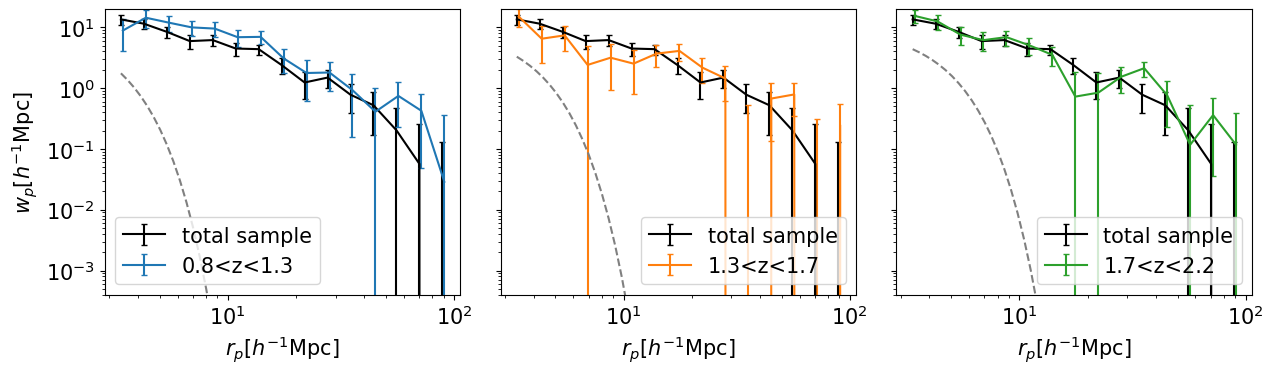

In [33]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(13, 4))
labels = [
    '0.8<z<1.3',
    '1.3<z<1.7',
    '1.7<z<2.2'
]

for i in range(3):
    zbar = np.load(f'../catalogue/quasar_lss_z{i+1}.npy')['z'].mean()
    fwhm1 = cosmos.comoving_distance(zbar).to('Mpc').value*(6*u.arcmin).to('rad').value*cosmos.h     # h^-1 Mpc
    sigma1 = fwhm1 / np.sqrt(8*np.log(2))

    axes[i].errorbar(r_p, *wpm_dict['total'], label='total sample', color='black', **errorbar_kw)
    axes[i].errorbar(r_p*1.02, *wpm_dict[f'z{i+1}'], label=labels[i], color=colors[i], **errorbar_kw)
    axes[i].plot(r_pp, np.exp(-r_pp*r_pp/(2*sigma1*sigma1))*10, '--', color='grey')
    axes[i].set_ylim(bottom=4e-4)

    axes[i].set_xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
    axes[i].legend()
    axes[i].loglog()

axes[0].set_ylabel(r'$w_p[h^{-1}\mathrm{Mpc}]$')
# y axis wp

# secax = axes[-1].secondary_yaxis('right', functions=(lambda y: y * scale_factor, lambda y: y / scale_factor))
# axes[0].set_ylabel(r'$\Sigma[h M_\odot /\mathrm{pc}^2]$')
# y axis Sigma


plt.tight_layout()

plt.savefig('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/figure/kappa z.pdf', bbox_inches='tight')


# sub sample comp (plot together)

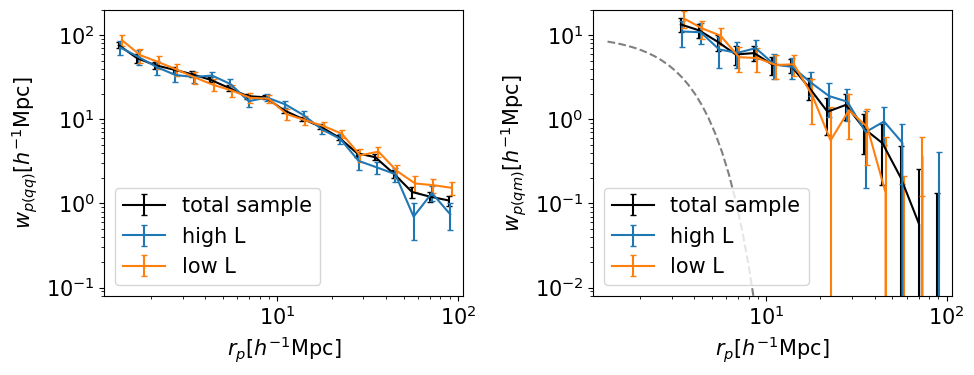

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes_auto, axes_cross = axes

axes_auto.errorbar(r_p_auto, *wp_dict['total'], label='total sample', color='black', **errorbar_kw)
axes_auto.errorbar(r_p_auto*1.02, *wp_dict['high'], label='high L', **errorbar_kw)
axes_auto.errorbar(r_p_auto*1.02**2, *wp_dict['low'], label='low L', **errorbar_kw)
axes_auto.set_xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
axes_auto.set_ylabel(r'$w_{p(qq)}[h^{-1}\mathrm{Mpc}]$')


axes_auto.set_xlim(*rp_range)
axes_auto.set_ylim(*wp_range)

axes_auto.legend()
axes_auto.loglog()


errorbar_kw = {'capsize': 2}
r_pp = np.geomspace(r_p_auto[0], r_p_auto[-1], 50)

axes_cross.errorbar(r_p, *wpm_dict['total'], label='total sample', color='black', **errorbar_kw)
axes_cross.errorbar(r_p*1.02, *wpm_dict['high'], label='high L', **errorbar_kw)
axes_cross.errorbar(r_p*1.02**2, *wpm_dict['low'], label='low L', **errorbar_kw)
axes_cross.plot(r_pp, np.exp(-r_pp*r_pp/(2*sigma*sigma))*10, '--', color='grey')

axes_cross.set_xlim(*rp_range)
axes_cross.set_ylim(*wpm_range)

axes_cross.set_xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
axes_cross.set_ylabel(r'$w_{p(qm)}[h^{-1}\mathrm{Mpc}]$')
# secax = axes_cross.secondary_yaxis('right', functions=(lambda y: y * scale_factor, lambda y: y / scale_factor))
# secax.set_ylabel(r'$\Sigma[h M_\odot /\mathrm{pc}^2]$')
axes_cross.legend()
axes_cross.loglog()

plt.tight_layout()

plt.savefig('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/figure/wp-wpm L.pdf', bbox_inches='tight')

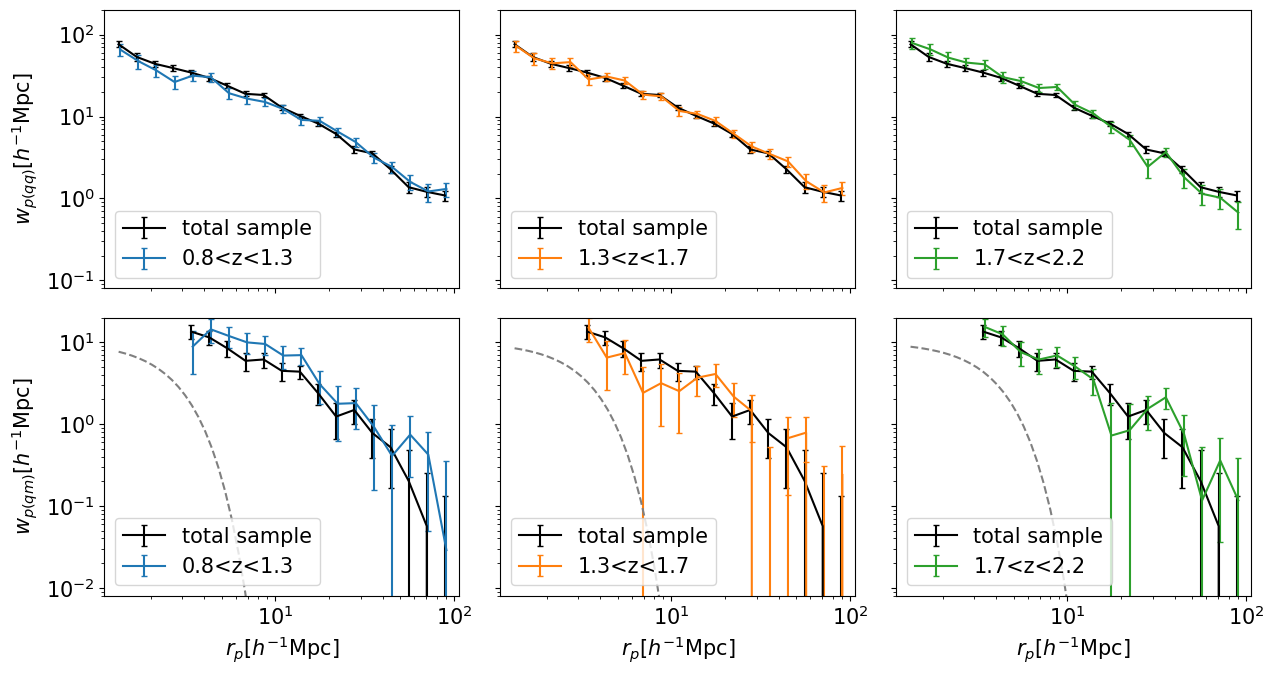

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(13, 7), sharey='row', sharex=True)
axes_auto, axes_cross = axes


labels = [
    '0.8<z<1.3',
    '1.3<z<1.7',
    '1.7<z<2.2'
]
for i in range(3):
    axes_auto[i].errorbar(r_p_auto, *wp_dict['total'], label='total sample', color='black', **errorbar_kw)
    axes_auto[i].errorbar(r_p_auto*1.02, *wp_dict[f'z{i+1}'], label=labels[i], color=colors[i], **errorbar_kw)
    # axes_auto[i].set_xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
    axes_auto[i].legend(loc='lower left')
    axes_auto[i].set_xlim(*rp_range)
    axes_auto[i].loglog()

axes_auto[0].set_ylabel(r'$w_{p(qq)}[h^{-1}\mathrm{Mpc}]$')
axes_auto[0].set_ylim(*wp_range)

for i in range(3):
    zbar = np.load(f'../catalogue/quasar_lss_z{i+1}.npy')['z'].mean()
    fwhm1 = cosmos.comoving_distance(zbar).to('Mpc').value*(6*u.arcmin).to('rad').value*cosmos.h     # h^-1 Mpc
    sigma1 = fwhm1 / np.sqrt(8*np.log(2))

    axes_cross[i].errorbar(r_p, *wpm_dict['total'], label='total sample', color='black', **errorbar_kw)
    axes_cross[i].errorbar(r_p*1.02, *wpm_dict[f'z{i+1}'], label=labels[i], color=colors[i], **errorbar_kw)
    axes_cross[i].plot(r_pp, np.exp(-r_pp*r_pp/(2*sigma1*sigma1))*10, '--', color='grey')
    # axes_cross[i].set_ylim(bottom=4e-4)

    axes_cross[i].set_xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
    axes_cross[i].legend()
    axes_cross[i].set_ylim(*rp_range)
    axes_cross[i].loglog()

axes_cross[0].set_ylabel(r'$w_{p(qm)}[h^{-1}\mathrm{Mpc}]$')
axes_cross[0].set_ylim(*wpm_range)
# secax = axes_cross[-1].secondary_yaxis('right', functions=(lambda y: y * scale_factor, lambda y: y / scale_factor))
# secax.set_ylabel(r'$\Sigma[h M_\odot /\mathrm{pc}^2]$')

plt.tight_layout()

plt.savefig('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/figure/wp-wpm z.pdf', bbox_inches='tight')

# auto+cross figure

In [37]:
def rp2index(rp, rprange, index_range):
    y0, y1 = index_range
    x0 = np.log10(rprange[0])
    x1 = np.log10(rprange[-1])
    return (np.log10(rp) - x0) / (x1 - x0) * (y1 - y0) + y0
minor_ticks = np.array([
    i*10**(j)
    for j in range(-1, 2)
    for i in range(2, 10)
])
major_ticks = np.array([0.1, 1, 10, 100])
tick_labels = np.array(['$10^{-1}$', '$1$', '$10$', '$10^2$'])

index_minor = np.logical_and(minor_ticks <= r_p_auto[-1], minor_ticks >= r_p_auto[0])
index_major = np.logical_and(major_ticks <= r_p_auto[-1], major_ticks >= r_p_auto[0])
minor_ticks1 = minor_ticks[index_minor]
major_ticks1 = major_ticks[index_major]
tick_labels1 = tick_labels[index_major]

index_minor = np.logical_and(minor_ticks <= r_p[-1], minor_ticks >= r_p[0])
index_major = np.logical_and(major_ticks <= r_p[-1], major_ticks >= r_p[0])
minor_ticks2 = minor_ticks[index_minor]
major_ticks2 = major_ticks[index_major]
tick_labels2 = tick_labels[index_major]

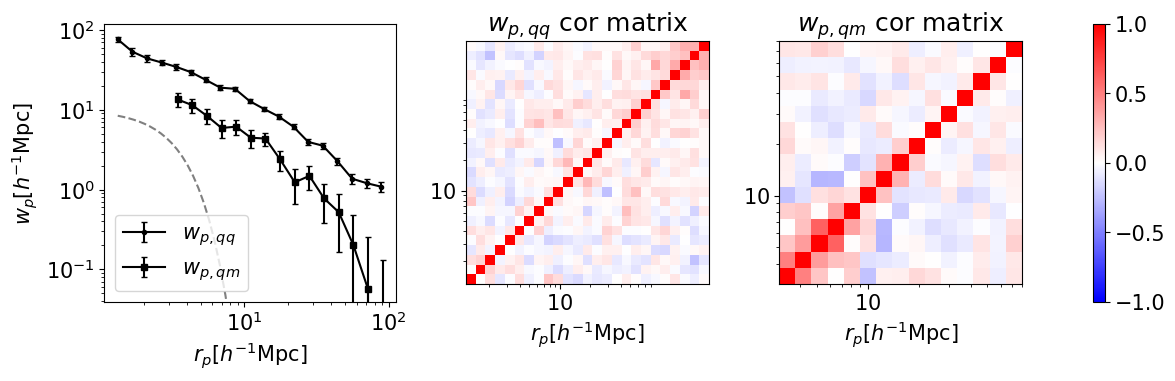

In [38]:
dat = np.load('quasar_lss_all_auto.npy')
cov_mat = np.cov(dat, ddof=0, rowvar=False)*(dat.shape[0]-1)
std = np.sqrt([cov_mat[i,i] for i in range(cov_mat.shape[0])])
norm_cov = cov_mat / (std.reshape(-1, 1) @ std.reshape(1, -1))

errorbar_kw = {'capsize': 2}

import matplotlib.gridspec as gridspec

kws = {'vmin': -1, 'vmax': 1, 'origin': 'lower', 'cmap': 'bwr'}
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[1.2, 1, 1, 0.05])

axes = [fig.add_subplot(gs[i]) for i in range(4)]

# fig, axes = plt.subplots(1, 3, figsize=(14, 4))

r_pp = np.geomspace(r_p_auto[0], r_p_auto[-1], 50)

zbar = np.load(f'../catalogue/quasar_lss_all.npy')['z'].mean()
fwhm1 = cosmos.comoving_distance(zbar).to('Mpc').value*(6*u.arcmin).to('rad').value*cosmos.h     # h^-1 Mpc
sigma1 = fwhm1 / np.sqrt(8*np.log(2))

axes[0].errorbar(r_p_auto, *wp_dict['total'], label='$w_{p,qq}$', color='black', fmt='.-', **errorbar_kw)
axes[0].errorbar(r_p*1.02, *wpm_dict['total'], label='$w_{p, qm}$', color='black', fmt='s-', markersize=5, **errorbar_kw)

axes[0].set_xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
axes[0].set_ylabel(r'$w_p[h^{-1}\mathrm{Mpc}]$')
axes[0].legend()
axes[0].loglog()

tmp_lim = axes[0].get_ylim()
axes[0].plot(r_pp, np.exp(-r_pp*r_pp/(2*sigma1*sigma1))*10, '--', color='grey')
axes[0].set_ylim(tmp_lim)

kws = {'vmin': -1, 'vmax': 1, 'origin': 'lower', 'cmap': 'bwr'}

im = axes[1].imshow(norm_cov, **kws)
axes[1].set_title(r'$w_{p, qq}$ cor matrix')
axes[1].set_xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')

axes[1].set_xticks(rp2index(minor_ticks1, (r_p_auto[0], r_p_auto[-1]), (0, len(r_p_auto))), minor=True)
axes[1].set_xticks(rp2index(major_ticks1, (r_p_auto[0], r_p_auto[-1]), (0, len(r_p_auto))))
axes[1].set_xticklabels(tick_labels1)

axes[1].set_yticks(rp2index(minor_ticks1, (r_p_auto[0], r_p_auto[-1]), (0, len(r_p_auto))), minor=True)
axes[1].set_yticks(rp2index(major_ticks1, (r_p_auto[0], r_p_auto[-1]), (0, len(r_p_auto))))
axes[1].set_yticklabels(tick_labels1)

axes[2].imshow(sampler_q['cov'], **kws)
axes[2].set_title(r'$w_{p, qm}$ cor matrix')
axes[2].set_xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')


axes[2].set_xticks(rp2index(minor_ticks2, (r_p[0], r_p[-1]), (0, len(r_p))), minor=True)
axes[2].set_xticks(rp2index(major_ticks2, (r_p[0], r_p[-1]), (0, len(r_p))))
axes[2].set_xticklabels(tick_labels2)

axes[2].set_yticks(rp2index(minor_ticks2, (r_p[0], r_p[-1]), (0, len(r_p))), minor=True)
axes[2].set_yticks(rp2index(major_ticks2, (r_p[0], r_p[-1]), (0, len(r_p))))
axes[2].set_yticklabels(tick_labels2)

fig.colorbar(im, cax=axes[-1])
plt.tight_layout()
plt.savefig('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/figure/signal.pdf', bbox_inches='tight')
plt.show()

# cross test cov

In [58]:
r_p, dat = load_calculation_data(f'../calculation_data/result_r=3_100_15_quasar_lss_all_CMB_smoothed_6_shuffle_tree.npy', return_rp=True)
dat_r = load_calculation_data(f'../calculation_data/result_r=3_100_15_random_quasar_lss_all_CMB_smoothed_6_shuffle_tree.npy')
Nside_jack = 10
quasar_cata = np.load('../catalogue/quasar_lss_all.npy')
random_sample = np.load('../catalogue/random_quasar_lss_all.npy')

pix = jackknife_label(quasar_cata, Nside_jack)
pix_r = jackknife_label(random_sample, Nside_jack)
sampler_q = calculate_jackknife_variance_global(dat[0], dat[1], pix, dat_r[0], dat_r[1], pix_r, norm_cov=True, return_jackknife=True)
sampler_qonly = calculate_jackknife_variance_global(dat[0], dat[1], pix, norm_cov=True, return_jackknife=True)
sampler_ronly = calculate_jackknife_variance_global(dat_r[0], dat_r[1], pix_r, norm_cov=True, return_jackknife=True)

In [52]:
def rp2index(rp):
    y0 = 0
    y1 = 14
    x0 = np.log10(r_p[0])
    x1 = np.log10(r_p[-1])
    return (np.log10(rp) - x0) / (x1 - x0) * (y1 - y0) + y0
minor_ticks = np.array([
    i*10**(j)
    for j in range(0, 2)
    for i in range(2, 10)
])
minor_ticks = minor_ticks[np.logical_and(minor_ticks <= r_p[-1], minor_ticks >= r_p[0])]
major_ticks = [10, 100]
tick_labels = ['$10$', '$10^2$']

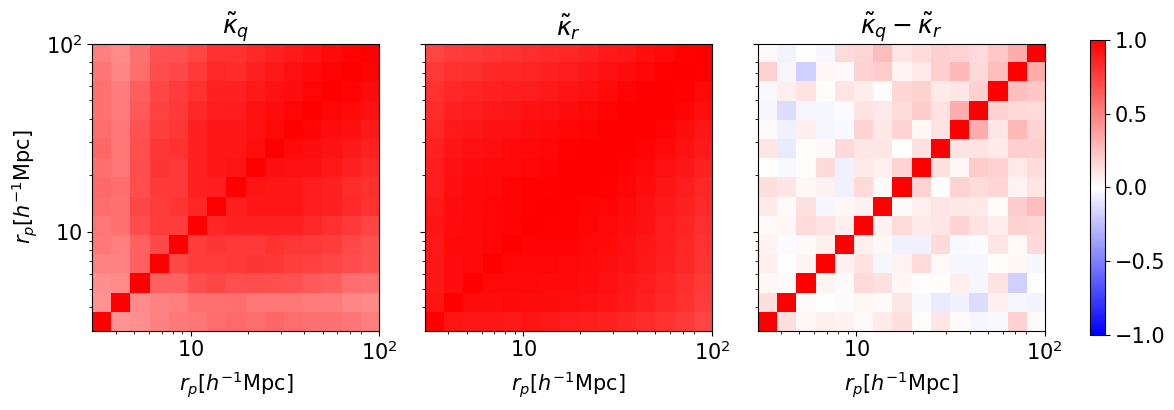

In [59]:
# fig, axes = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(9, 3))
import matplotlib.gridspec as gridspec

kws = {'vmin': -1, 'vmax': 1, 'origin': 'lower', 'cmap': 'bwr'}
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])

axes = [fig.add_subplot(gs[i]) for i in range(4)]

im = axes[0].imshow(sampler_qonly['cov'], **kws)
axes[1].imshow(sampler_ronly['cov'], **kws)
axes[2].imshow(sampler_q['cov'], **kws)

axes[0].set_title(r'$\tilde{\kappa}_q$')
axes[1].set_title(r'$\tilde{\kappa}_r$')
axes[2].set_title(r'$\tilde{\kappa}_q-\tilde{\kappa}_r$')
# axes[0].tick_params(labelrotation=45)

for i in range(3):
    axes[i].set_xticks(rp2index(minor_ticks), minor=True)
    axes[i].set_xticks(rp2index(major_ticks))
    axes[i].set_xticklabels(tick_labels)
    axes[i].set_xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
    axes[i].set_yticks(rp2index(minor_ticks), minor=True)
    axes[i].set_yticks(rp2index(major_ticks))
    axes[i].set_yticklabels([])

axes[0].set_yticklabels(tick_labels)
axes[0].set_ylabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')

fig.colorbar(im, cax=axes[-1])
plt.tight_layout()

plt.savefig('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/figure/cov_random.pdf', bbox_inches='tight')

plt.show()


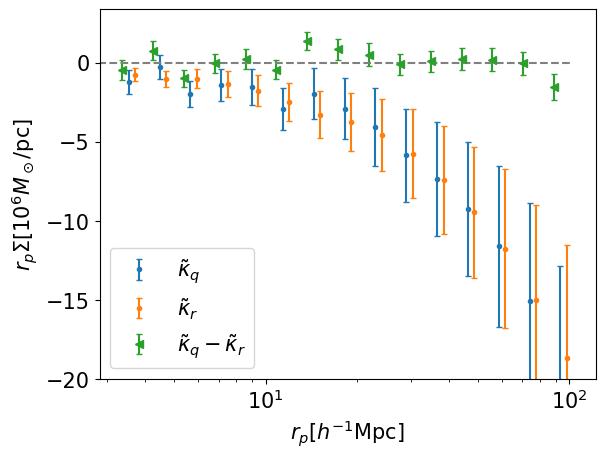

In [60]:
errorbar_kw = {'capsize': 2}

plt.errorbar(r_p*1.05, r_p*sampler_qonly['mean'], r_p*sampler_qonly['std'], **errorbar_kw, fmt='.', label=r'$\tilde{\kappa}_q$')
plt.errorbar(r_p*1.05**2, r_p*sampler_ronly['mean'], r_p*sampler_ronly['std'], **errorbar_kw, fmt='.', label=r'$\tilde{\kappa}_r$')
plt.errorbar(r_p, r_p*sampler_q['mean'], r_p*sampler_q['std'], **errorbar_kw, fmt='<', label=r'$\tilde{\kappa}_q-\tilde{\kappa}_r$')

plt.hlines(0, *plt.xlim(), linestyles='dashed', colors='grey')
plt.ylim(bottom=-20)
plt.ylabel(r'$r_p \Sigma[10^6 M_\odot /\mathrm{pc}]$')
plt.xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
plt.legend()
plt.semilogx()

plt.savefig('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/figure/sigma_random.pdf', bbox_inches='tight')


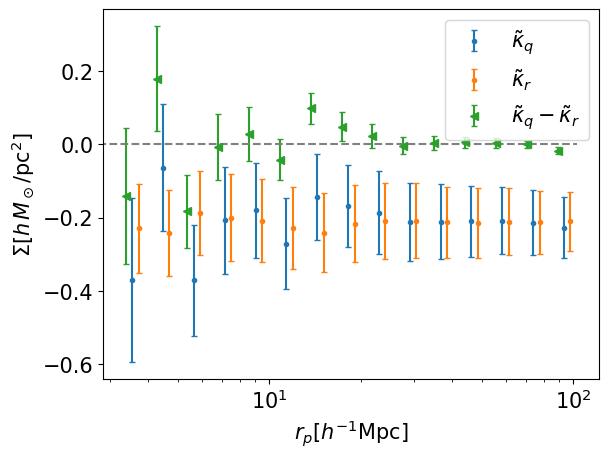

In [61]:
errorbar_kw = {'capsize': 2}

plt.errorbar(r_p*1.05, sampler_qonly['mean'], sampler_qonly['std'], **errorbar_kw, fmt='.', label=r'$\tilde{\kappa}_q$')
plt.errorbar(r_p*1.05**2, sampler_ronly['mean'], sampler_ronly['std'], **errorbar_kw, fmt='.', label=r'$\tilde{\kappa}_r$')
plt.errorbar(r_p, sampler_q['mean'], sampler_q['std'], **errorbar_kw, fmt='<', label=r'$\tilde{\kappa}_q-\tilde{\kappa}_r$')

plt.hlines(0, *plt.xlim(), linestyles='dashed', colors='grey')
# plt.ylim(bottom=-20)
plt.ylabel(r'$\Sigma[h\,M_\odot /\mathrm{pc}^2]$')
plt.xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
plt.legend()
plt.semilogx()

plt.savefig('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/figure/sigma_random_style_2.pdf', bbox_inches='tight')

In [55]:
r_p, dat = load_calculation_data(f'../calculation_data/result_r=3_100_15_quasar_lss_all_CMB_smoothed_6_tree.npy', return_rp=True)
dat_r = load_calculation_data(f'../calculation_data/result_r=3_100_15_random_quasar_lss_all_CMB_smoothed_6_tree.npy')
Nside_jack = 10
quasar_cata = np.load('../catalogue/quasar_lss_all.npy')
random_sample = np.load('../catalogue/random_quasar_lss_all.npy')

pix = jackknife_label(quasar_cata, Nside_jack)
pix_r = jackknife_label(random_sample, Nside_jack)
sampler_q = calculate_jackknife_variance_global(dat[0], dat[1], pix, dat_r[0], dat_r[1], pix_r, norm_cov=True, return_jackknife=True)
sampler_qonly = calculate_jackknife_variance_global(dat[0], dat[1], pix, norm_cov=True, return_jackknife=True)
sampler_ronly = calculate_jackknife_variance_global(dat_r[0], dat_r[1], pix_r, norm_cov=True, return_jackknife=True)

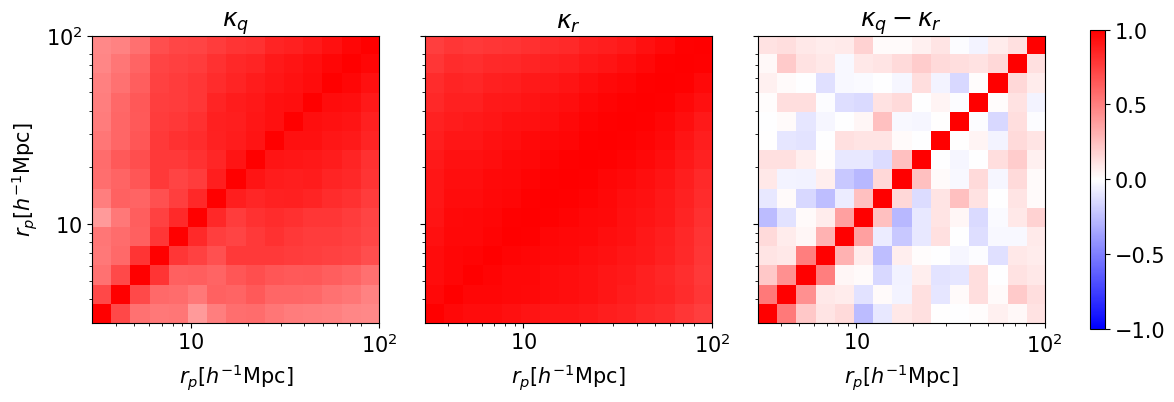

In [56]:
# fig, axes = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(9, 3))
import matplotlib.gridspec as gridspec

kws = {'vmin': -1, 'vmax': 1, 'origin': 'lower', 'cmap': 'bwr'}
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])

axes = [fig.add_subplot(gs[i]) for i in range(4)]

im = axes[0].imshow(sampler_qonly['cov'], **kws)
axes[1].imshow(sampler_ronly['cov'], **kws)
axes[2].imshow(sampler_q['cov'], **kws)

axes[0].set_title(r'$\kappa_q$')
axes[1].set_title(r'$\kappa_r$')
axes[2].set_title(r'$\kappa_q-\kappa_r$')
# axes[0].tick_params(labelrotation=45)

for i in range(3):
    axes[i].set_xticks(rp2index(minor_ticks), minor=True)
    axes[i].set_xticks(rp2index(major_ticks))
    axes[i].set_xticklabels(tick_labels)
    axes[i].set_xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
    axes[i].set_yticks(rp2index(minor_ticks), minor=True)
    axes[i].set_yticks(rp2index(major_ticks))
    axes[i].set_yticklabels([])

axes[0].set_yticklabels(tick_labels)
axes[0].set_ylabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')

fig.colorbar(im, cax=axes[-1])
plt.tight_layout()

plt.savefig('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/figure/cov_kappa.pdf', bbox_inches='tight')

plt.show()


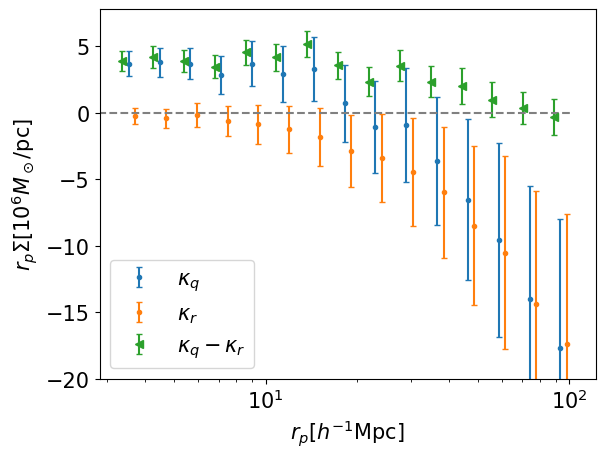

In [57]:
errorbar_kw = {'capsize': 2}

plt.errorbar(r_p*1.05, r_p*sampler_qonly['mean'], r_p*sampler_qonly['std'], **errorbar_kw, fmt='.', label=r'$\kappa_q$')
plt.errorbar(r_p*1.05**2, r_p*sampler_ronly['mean'], r_p*sampler_ronly['std'], **errorbar_kw, fmt='.', label=r'$\kappa_r$')
plt.errorbar(r_p, r_p*sampler_q['mean'], r_p*sampler_q['std'], **errorbar_kw, fmt='<', label=r'$\kappa_q-\kappa_r$')
plt.hlines(0, *plt.xlim(), linestyles='dashed', colors='grey')
plt.ylim(bottom=-20)
plt.ylabel(r'$r_p \Sigma[10^6 M_\odot /\mathrm{pc}]$')
plt.xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
plt.legend()
plt.semilogx()

plt.savefig('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/figure/sigma_kappa.pdf', bbox_inches='tight')


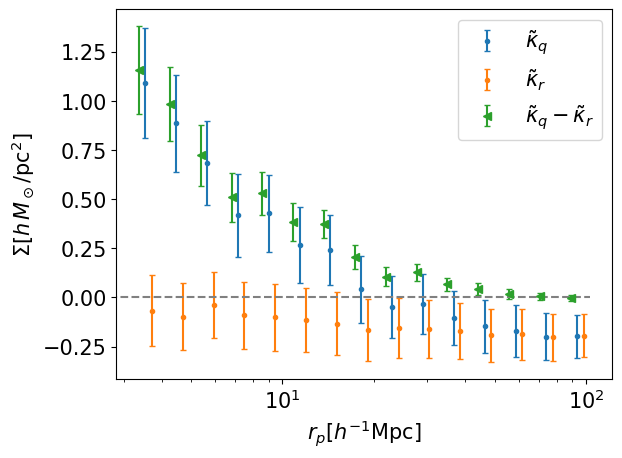

In [48]:
errorbar_kw = {'capsize': 2}

plt.errorbar(r_p*1.05, sampler_qonly['mean'], sampler_qonly['std'], **errorbar_kw, fmt='.', label=r'$\tilde{\kappa}_q$')
plt.errorbar(r_p*1.05**2, sampler_ronly['mean'], sampler_ronly['std'], **errorbar_kw, fmt='.', label=r'$\tilde{\kappa}_r$')
plt.errorbar(r_p, sampler_q['mean'], sampler_q['std'], **errorbar_kw, fmt='<', label=r'$\tilde{\kappa}_q-\tilde{\kappa}_r$')

plt.hlines(0, *plt.xlim(), linestyles='dashed', colors='grey')
# plt.ylim(bottom=-20)
plt.ylabel(r'$\Sigma[h\,M_\odot /\mathrm{pc}^2]$')
plt.xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
plt.legend()
plt.semilogx()

plt.savefig('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/figure/sigma_kappa_style_2.pdf', bbox_inches='tight')